# Actividad 3.4 – Representación plot de datasets, selección de características y entrenamiento de modelos. 

<a id="indice"></a>
# ÍNDICE

[1. (5%) Describir el origen y breve explicación del Dataset, así como de cada una de las 
características.](#question1)

[2. (5%) Procesamiento y normalización de datos en el dataset](#question2)

[3. Utilizar las siguientes herramientas explicadas en clase para la selección de características:](#question3)

[3.1.  (10%) Matriz de gráficos de correlación.](#question31)

[3.2.  (10%) Matriz de gráficos de dispersión.](#question32) 

[3.3.  (10%) SelectKBest.](#question33) 

[4. (5%) Una pequeña reflexión sobre la elección de las características elegidas.](#question4) 

[5. Con las librerías para NaiveBayes vistas en clase, entrenar el modelo que consideres más 
adecuado.](#question5) 

[5.1.  (10%) Sin utilizar Cross Validation.](#question51) 

[5.2.  (15%) Utilizando Cross Validation.](#question52) 

[6.  (5%) Obtener una conclusión sobre los resultados obtenidos en la predicción y evaluación 
al utilizar o no Cross Validation.](#question6) 

[7. (10%) Además de las herramientas indicadas anteriormente, se valorará la utilización de 
alguna otra herramienta o técnica no vista en el curso para la selección de las 
características.](#question7)

<a id='question1'></a>
1. (5%) Describir el origen y breve explicación del Dataset, así como de cada una de las 
características.

[Volver al índice](#indice) 

El dataset ha sido obtenido de Kaggle: https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond/data

Este conjunto de datos incluye información para estimar los niveles de obesidad en personas de los países de México, Perú y Colombia, basándose en sus hábitos alimenticios y condición física. El 23% de los datos se recopiló directamente de usuarios mediante una encuesta realizada por Fabio Mendoza Palechor y Alexis de la Hoz Manotas en una plataforma web, y el 77% de los datos se generó sintéticamente utilizando la herramienta Weka y el filtro SMOTE.

Según la documentación proprocionada en Kaggle sobre las columnas:

- <i><b>Gender</b></i> es 1 si el encuestado es hombre y 0 si es mujer.
- <i><b>Age</b></i>  es la edad del encuestado en años.
- <i><b>family_history_with_overweight</b></i> es 1 si el encuestado tiene un familiar que está o estuvo con sobrepeso, 0 si no.
- <i><b>FAVC</b></i> es 1 si el encuestado come frecuentemente alimentos altos en calorías, 0 si no.
- <i><b>FCVC</b></i> es 1 si el encuestado suele comer vegetales en sus comidas, 0 si no.
- <i><b>NCP</b></i> representa cuántas comidas principales tiene el encuestado al día (0 para 1-2 comidas, 1 para 3 comidas y 2 para más de 3 comidas).
- <i><b>CAEC</b></i> representa cuánta comida come el encuestado entre comidas en una escala de 0 a 3.
- <i><b>SMOKE</b></i> es 1 si el encuestado fuma, 0 si no.
- <i><b>CH2O</b></i> representa cuánta agua bebe el encuestado en una escala de 0 a 2.
- <i><b>SCC</b></i> es 1 si el encuestado monitorea su ingesta calórica, 0 si no.
- <i><b>FAF</b></i> representa cuánta actividad física realiza el encuestado en una escala de 0 a 3.
- <i><b>TUE</b></i> representa cuánto tiempo pasa el encuestado mirando dispositivos con pantallas en una escala de 0 a 2.
- <i><b>CALC</b></i> representa con qué frecuencia el encuestado consume alcohol en una escala de 0 a 3.
- <i><b>Automobile, Bike, Motorbike, Public_Transportation, and Walking</b></i> indican el medio de transporte principal del encuestado. Su medio de transporte principal se indica con un 1 y las otras columnas contendrán un 0.
- <i><b>NObeyesdad</b></i> es 1 si el paciente tiene obesidad y 0 si no.

Al realizar el análisis de los datos me he dado cuenta de que esto no es completamente real, algo que comentaré en el siguiente apartado.

<a id='question2'></a>
2. (5%) Procesamiento y normalización de datos en el dataset

[Volver al índice](#indice) 

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Lee el archivo CSV
archivo_csv = "obesity.csv"
datos = pd.read_csv(archivo_csv)

datos

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [2]:
# Itera sobre todas las columnas y muestra los valores y sus frecuencias
for columna in datos.columns:
    conteo_valores = datos[columna].value_counts()
    print(f"\nColumna: {columna}\n{conteo_valores}")


Columna: Gender
Gender
1    1068
0    1043
Name: count, dtype: int64

Columna: Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Columna: family_history_with_overweight
family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

Columna: FAVC
FAVC
1    1866
0     245
Name: count, dtype: int64

Columna: FCVC
FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

Columna: NCP
NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64

Columna: CAEC
CAEC
1 

- FCVC realmente se encuentra en una escala de 1 a 3
- NCP realmente se encuentra en una escala de 1 a 4

Por lo tanto, he decidido redondear estos valores para asemejarlos lo más posible a la documentación proprocionada.

In [3]:
# Nombre de las columnas a redondear
columnas_a_redondear = ["FCVC", "NCP"]

# Redondear los valores de las columnas específicas a enteros
datos[columnas_a_redondear] = datos[columnas_a_redondear].round().astype(int)

In [4]:
# Itera sobre todas las columnas y muestra los valores y sus frecuencias
for columna in datos.columns:
    conteo_valores = datos[columna].value_counts()
    print(f"\nColumna: {columna}\n{conteo_valores}")


Columna: Gender
Gender
1    1068
0    1043
Name: count, dtype: int64

Columna: Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Columna: family_history_with_overweight
family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

Columna: FAVC
FAVC
1    1866
0     245
Name: count, dtype: int64

Columna: FCVC
FCVC
2    1013
3     996
1     102
Name: count, dtype: int64

Columna: NCP
NCP
3    1470
1     316
2     176
4     149
Name: count, dtype: int64

Columna: CAEC
CAEC
1    1765
2     242
3      53
0      51
Name: count, dtype: int64

Columna: SMOKE
SMOKE
0    2067
1      44
Name: count, dtype: int64

Columna: CH2O
CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.86351

<a id='question3'></a>
3. Utilizar las siguientes herramientas explicadas en clase para la selección de características: 

<a id='question31'></a>
3.1  (10%) Matriz de gráficos de correlación

[Volver al índice](#indice) 

<Axes: >

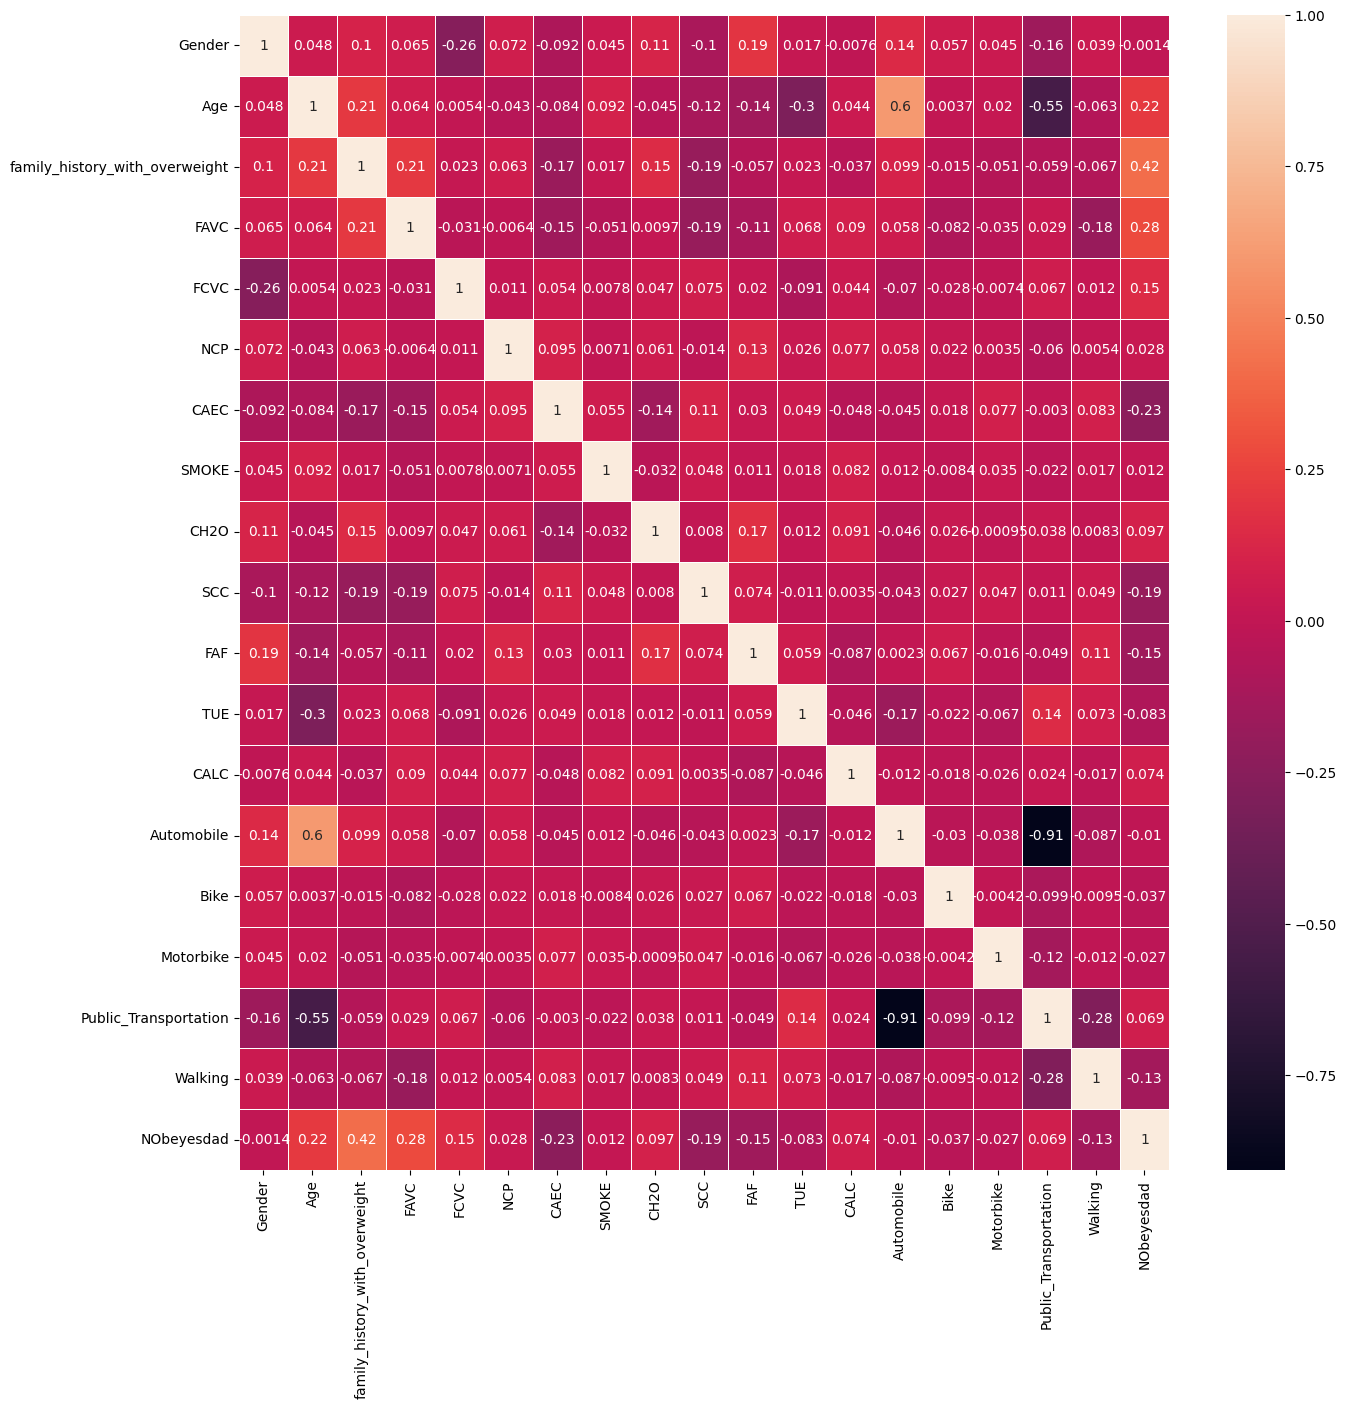

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(datos.corr(), annot=True, linewidths=.5, ax=ax)

<a id='question32'></a>
3.2.  (10%) Matriz de gráficos de dispersión

[Volver al índice](#indice) 

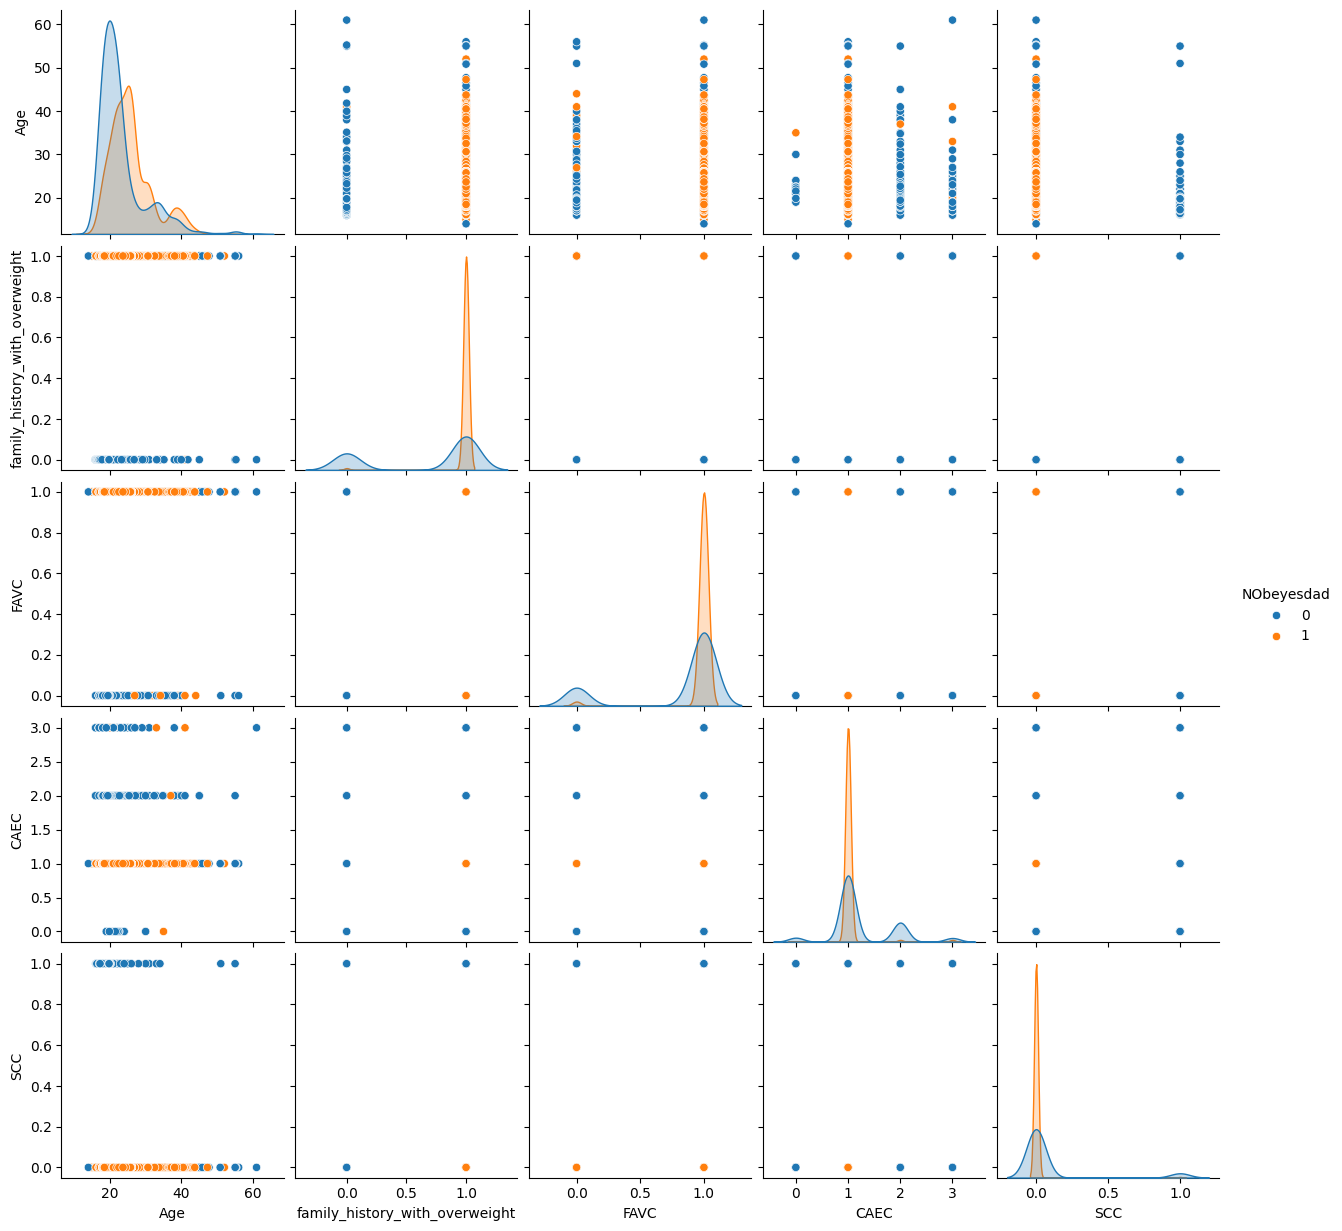

In [6]:
sns.pairplot(datos,vars=['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC'], hue="NObeyesdad")

<a id='question33'></a>
3.3.  (10%) SelectKBest.

[Volver al índice](#indice) 

In [7]:
# Separa las características (X) y la variable objetivo (y)
X = datos.drop('NObeyesdad', axis=1)  # Ajusta 'variable_objetivo' al nombre de tu columna objetivo
y = datos['NObeyesdad']

# Crea el objeto SelectKBest con la función de puntuación (f_classif en este caso)
k_best = SelectKBest(score_func=f_classif, k=5)  # Ajusta 'k' al número deseado de características

# Aplica SelectKBest a tus datos
X_seleccionado = k_best.fit_transform(X, y)

# Imprime las características seleccionadas
print("Características seleccionadas:")
print(X.columns[k_best.get_support()])

# Muestra las puntuaciones de las características
print("Puntuaciones de las características:")
print(k_best.scores_)

Características seleccionadas:
Index(['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC'], dtype='object')
Puntuaciones de las características:
[4.35064152e-03 1.04695500e+02 4.42912688e+02 1.77133293e+02
 4.66531305e+01 1.59759513e+00 1.20869840e+02 2.82767809e-01
 2.02089152e+01 7.72304355e+01 4.66426309e+01 1.45382728e+01
 1.15800053e+01 2.19779854e-01 2.85253468e+00 1.56809055e+00
 1.00857112e+01 3.90047492e+01]


<a id='question4'></a>
4. (5%) Una pequeña reflexión sobre la elección de las características elegidas. 

[Volver al índice](#indice) 

En mi opinión es bastante acertado que tanto la edad como el historial de obesidad en la familia sean las mejores características con respecto a presentar obesidad o no. Pese a que quizás viendo la matriz de correlación no me parezca que 'CAEC' <i>(representa cuánta comida come el encuestado entre comidas en una escala de 0 a 3.)</i> y 'SCC' <i>(es 1 si el encuestado monitorea su ingesta calórica, 0 si no.)</i> si las considero características importantes teniendo en cuenta el problema el cuál estamos tratando. Por lo tanto, he decidido quedarme con estas características que el SelectKBest me ha proporcionado. He realizado de nuevo una matriz de correlación solamente con estas características para volver a destacar que la característica más importante en este problema es el historial de obesidad en la familia.

<Axes: >

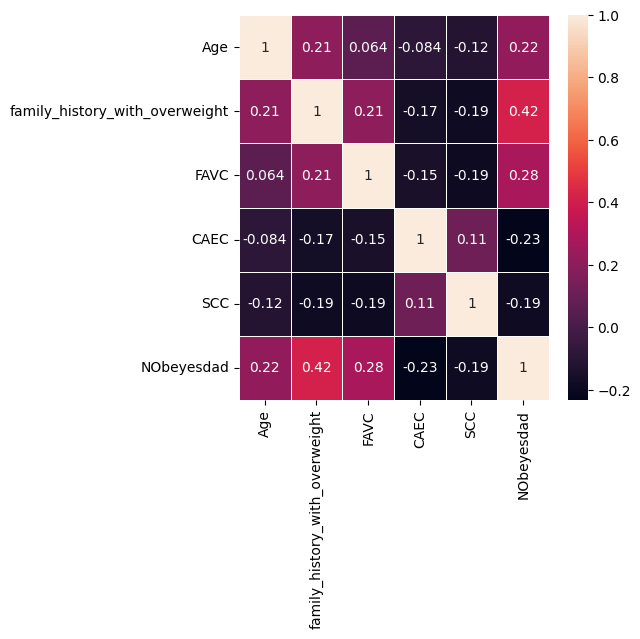

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_seleccionadas = ['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC']

columnas_seleccionadas_con_obesidad = ['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'NObeyesdad']

datos_corr = datos[columnas_seleccionadas_con_obesidad]

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(datos_corr.corr(), annot=True, linewidths=.5, ax=ax)

<a id='question5'></a>
5. Con las librerías para NaiveBayes vistas en clase, entrenar el modelo que consideres más adecuado

[Volver al índice](#indice) 

Debido a que es un problema en el cual las características se combinan entre binarios (0 y 1) y características numéricas continuas, considero que el modelo más acertado para este conjunto de datos sería el GaussianNB.

In [9]:
from sklearn.model_selection import train_test_split

# feature selection and transformation
X = datos[columnas_seleccionadas]
y = datos['NObeyesdad']
# train and test

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42, stratify=y)

<a id='question51'></a>
5.1.  (10%) Sin utilizar Cross Validation.

[Volver al índice](#indice) 

In [10]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [11]:
y_model = model.predict(X_test)
y_model

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [12]:
accuracy = accuracy_score(y_test, y_model) # Precisión del modelo
accuracy

0.7159763313609467

<a id='question52'></a>
5.2.  (15%) Utilizando Cross Validation.

[Volver al índice](#indice) 

In [13]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal
fold_accuracy = []
for train_fold, test_fold in cv.split(X_train):
  # División train test aleatoria
  f_train_x = X_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
  f_train_y = y_train.iloc[train_fold]
  # entrenamiento y ejeución del modelo
  model.fit(f_train_x, f_train_y)
  # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
  y_pred = model.predict(X_train.iloc[test_fold])
  # evaluación del modelo
  acc = accuracy_score(y_train.iloc[test_fold], y_pred)
  fold_accuracy.append(acc)
  accuracy_cross_validation = sum(fold_accuracy)/len(fold_accuracy)

accuracy_cross_validation

0.7756683576608261

<a id='question6'></a>
6.  (5%) Obtener una conclusión sobre los resultados obtenidos en la predicción y evaluación 
al utilizar o no Cross Validation.

[Volver al índice](#indice) 

Como ya hemos visto en otras ocasiones, al aplicar Cross Validation pueden mejorar los resultados, como parece ser en este caso. Al fin y al cabo, el Cross Validation nos permite tener una mayor robustez en nuestros resultados debido a que se realizan pequeñas particiones de datos para entrenar solamente con esa pequeña partición, por lo tanto, no creamos dependencia de una única partición que pueden llevar a conclusiones sesgadas sobre el rendimiento del modelo.

<a id='question7'></a>
7. (10%) Además de las herramientas indicadas anteriormente, se valorará la utilización de alguna otra herramienta o técnica no vista en el curso para la selección de las características

[Volver al índice](#indice) 

He decidido utilizar RFE también de la librería sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Podemos ver como comenté anteriormente que incluso para este modelo sigue siendo de gran importancia los atributos de edad e historial de obesidad en la familia.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Supongamos que tienes una columna llamada 'target' que representa la variable objetivo
X = datos.drop('NObeyesdad', axis=1)  # Features
y = datos['NObeyesdad']  # Variable objetivo

# Utiliza un clasificador, por ejemplo, RandomForestClassifier
modelo = RandomForestClassifier()

# Aplica RFE
selector_rfe = RFE(modelo, n_features_to_select=5)  # Especifica el número de características a seleccionar
X_rfe = selector_rfe.fit_transform(X, y)

# Muestra las características seleccionadas
columnas_seleccionadas = X.columns[selector_rfe.support_]
print("Características seleccionadas:", columnas_seleccionadas)

Características seleccionadas: Index(['Age', 'family_history_with_overweight', 'CH2O', 'FAF', 'TUE'], dtype='object')
